In [1]:
import numpy as np
import matplotlib.pyplot as plt

fig_set = {
    "axes.linewidth": .5,
    "axes.labelsize": 10,
    "axes.labelpad": 4.0,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8,
    "xtick.major.size": 3,
    "ytick.major.size": 3,
    "ytick.right" : True,
    "xtick.minor.visible" : False,
    "ytick.minor.visible" : True,
    "font.size": 10,
    "font.family": 'sans-serif',
    "legend.framealpha": .5,
    "legend.frameon" : False,
    "xtick.direction": 'in', 
    "ytick.direction": 'in'
}

plt.rcParams.update(fig_set)

In [2]:
data = np.loadtxt("../lin_dipole/data/Fld/rmhdfs_r0.1.slab_linear.run07D4_j-phi.g0000.idn.001")

In [3]:
dt=1.0
nx=1280*2+1
nt=int(data.shape[0]/nx)
x=data[0:nx,0]
xx = 90-np.arcsin(np.sqrt(x))*180/np.pi
xc = np.arcsin(np.sqrt(x))*180/np.pi
t=dt * np.arange(nt)
dns=(data[:,1]+1j*data[:,2]).reshape(nt,nx)

dns0 =  (np.abs( dns[0,:].real ) ).max()
dns = dns.real/dns0 

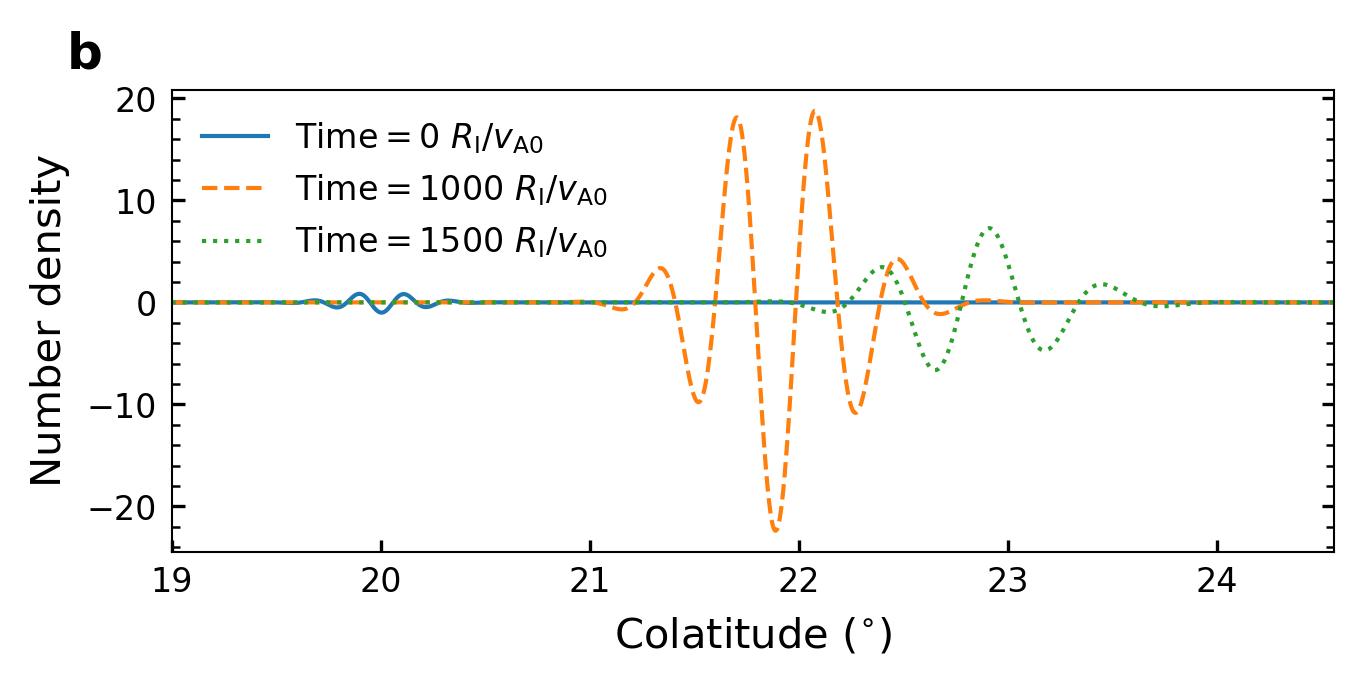

In [4]:
dpi = 300
fig, ax= plt.subplots(figsize=(5,2), dpi=dpi)
ax.set_xlim(19, xc.max())
ax.set_ylabel("Number density")
ax.set_xlabel( "Colatitude $(^\mathrm{\circ})$") 
ax.plot(xc,dns[0,:].real,linewidth=1 , label="$\mathrm{Time}=0~R_\mathrm{I}/v_{\mathrm{A}0}$")
ax.plot(xc,dns[1000,:].real,linewidth=1, label="$\mathrm{Time}=1000~R_\mathrm{I}/v_{\mathrm{A}0}$", linestyle="dashed")
ax.plot(xc,dns[1500,:].real,linewidth=1 , label="$\mathrm{Time}=1500~R_\mathrm{I}/v_{\mathrm{A}0}$", linestyle="dotted" )
plt.legend(fontsize=8)
ax.text(18.5, 23, "b", fontfamily="sans-serif", fontweight="bold", fontsize=12)
plt.savefig("../fig3-6/fig_sub/fig3b.png", bbox_inches='tight', pad_inches=0.1)
plt.show()